In [2]:
import numpy as np                         
import matplotlib                          
import matplotlib.pyplot as plt       
import pykat.optics.maps as pkm
from pykat import finesse                 
from pykat.commands import *               
from pykat.optics.maps import *            
from IPython.display import display, HTML


%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [5]:
kat = pykat.finesse.kat()
kat.verbose=False
kat.parse("""
l laser 1 0 0 n0
gauss g1 laser n0 1m 0

s s0 1 n0 nmod1

mod eom 60M 0.3 1 pm nmod1 nmod2
s s1 0 nmod2 n1

m1 ITM 0.014 3.75e-05 0 n1 n2
s sCav 3994.4692 n2 n3
m1 ETM 5e-06 3.75e-05 -34 n3 n4

#higher order mode LG22
tem laser 0 0 0 0
tem laser 6 0 0.484123 0
tem laser 5 1 -0.395285 90
tem laser 4 2 -0.125 180
tem laser 3 3 0.433013 270
tem laser 2 4 -0.125 0
tem laser 1 5 -0.395285 90
tem laser 0 6 0.484123 180


#Gaussian model
cav cavity ITM n2 ETM n3
attr ITM Rc -2013.35
attr ETM Rc 2013.35

maxtem 6

map ETM ETM08_S1_-power160_finesse.txt

pd Pcirc n3
pd1 PDH 80M 0 n1
xaxis ETM phi lin 0 360 300
""")

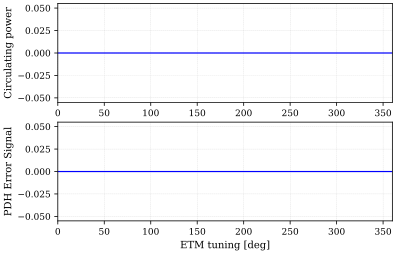

In [6]:
def pltPE(kat,label=None):
    out=kat.run()
    ax1.plot(out.x,out["Pcirc"],label=label)
    ax1.set_ylabel("Circulating power")
    ax2.plot(out.x,out["PDH"])
    ax2.set_xlabel('ETM tuning [deg]')
    ax2.set_ylabel('PDH Error Signal')
    
fig,(ax1,ax2) =plt.subplots(2,1)

k1=kat.deepcopy()
k1.parse("""
            attr ETM Rcx 5.9
            attr ETM Rcy 6.1
         """)
pltPE(k1)

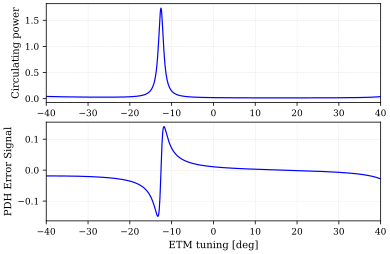

In [15]:
def pltPE(kat,label=None):
    out=kat.run()
    ax1.plot(out.x,out["Pcirc"],label=label)
    ax1.set_ylabel("Circulating power")
    ax2.plot(out.x,out["PDH"])
    ax2.set_xlabel('ETM tuning [deg]')
    ax2.set_ylabel('PDH Error Signal')
    
fig,(ax1,ax2) =plt.subplots(2,1)

k2=kat.deepcopy()
k2.parse("""
            attr ETM Rcx 5.5
            attr ETM Rcy 6.5
         """)
pltPE(k2)

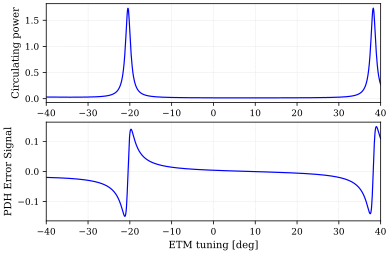

In [16]:
def pltPE(kat,label=None):
    out=kat.run()
    ax1.plot(out.x,out["Pcirc"],label=label)
    ax1.set_ylabel("Circulating power")
    ax2.plot(out.x,out["PDH"])
    ax2.set_xlabel('ETM tuning [deg]')
    ax2.set_ylabel('PDH Error Signal')
    
fig,(ax1,ax2) =plt.subplots(2,1)

k3=kat.deepcopy()
k3.parse("""
            attr ETM Rcx 5
            attr ETM Rcy 7
         """)
pltPE(k3)

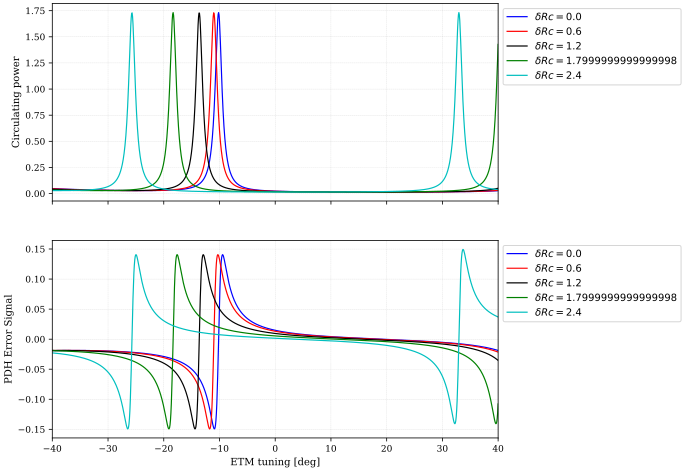

In [5]:
def pltPE(kat):
    fig,ax=plt.subplots(2,1,figsize=(8,8),sharex=True)
    for i in range(5):
        kat.parse("""
            attr ETM Rcx {0}
            attr ETM Rcy {1}
                """.format(6-(i)*0.3,6+(i)*0.3))
        out=kat.run()
        ax[0].plot(out.x,out["Pcirc"],label='$\delta Rc={}$'.format(0.6*(i)))
        ax[1].plot(out.x,out["PDH"],label='$\delta Rc={}$'.format(0.6*(i)))
    ax[1].set_xlabel('ETM tuning [deg]')
    ax[0].legend(loc=2,bbox_to_anchor=(1,1))
    ax[1].legend(loc=2,bbox_to_anchor=(1,1))
    ax[0].set_ylabel("Circulating power")
    ax[1].set_ylabel('PDH Error Signal')
    
k3=kat.deepcopy()
pltPE(k3)